Вариант 6

In [1]:
import numpy as np

Initial initialization

In [2]:
ksi = 1/15
A = 1/10
B = 1/12
h = 1/2
c2 = ksi
a21 = c2
b2 = 1/(2*c2)
b1 = 1-1/(2*c2)

In [3]:
def norm_2(x):
    return np.sqrt(np.sum(np.power(np.array(x), 2))) 

def norm_1(x):
    return np.abs(np.array(x)).sum()

def norm_inf(x):
    return np.max(np.abs(np.array(x)))

In [4]:
def runge_kutta_my_scheme(h):
    x = np.arange(0, np.pi, h)
    y = np.array((np.pi/12, np.pi/10))
    for i in range(len(x)):
        k11 = h*y[1]*A
        k12 = -h*y[0]*B
        k21 = h*(y[1]*A + a21*k11)
        k22 = h*(-y[0]*B + a21*k12)
        y[0] = y[0] + (b1*k11 + b2*k21)
        y[1] = y[1] + (b1*k12 + b2*k22)
    return y

def optim_step_my_scheme():
    R = [1e2, 1e2]
    eps = 1e-4
    DELTA = (1/np.pi)**3 + norm_2([np.pi/12, np.pi/10])**3
    h = (eps/DELTA)**(1/3)
    count = 0
    while norm_2(R)>eps:
        y_h1 = runge_kutta_my_scheme(h)
        y_h2 = runge_kutta_my_scheme(h/2)
        R = abs(y_h2 - y_h1)/3
        count += 1
        h = h/2 * np.sqrt(3*eps/norm_2(y_h2 - y_h1))
    print(f'Error for both diff. eq. is {R}, optimal step is {h}\nValues of our functions in x=pi is {y_h1}\nWe had {count} steps\n')
    return h

In [5]:
h_my = optim_step_my_scheme()

Error for both diff. eq. is [3.84269202e-05 3.96151929e-05], optimal step is 0.0037573928486273
Values of our functions in x=pi is [0.34872119 0.23344378]
We had 3 steps



In [19]:
def runge_kutta_opponent(h):
    x = np.arange(0, np.pi, h)
    y = [np.pi/12, np.pi/10]
    for i in range(len(x)):
        k11 = h*y[1]*A
        k12 = -h*y[0]*B

        k21 = h*(y[1]*A + 1/2*k11)
        k22 = h*(-y[0]*B + 1/2*k12)

        k31 = h*(y[1]*A + 1/2*(np.sqrt(2)-1)*k11 + (1 - 1/np.sqrt(2)) * k21)
        k32 = h*(-y[0]*B + 1/2*(np.sqrt(2)-1)*k12 + (1 - 1/np.sqrt(2)) * k22)

        k41 = h*(y[1]*A - 1/np.sqrt(2)*k21 + (1 + 1/np.sqrt(2)) * k31)
        k42 = h*(-y[0]*B - 1/np.sqrt(2)*k22 + (1 + 1/np.sqrt(2)) * k32)

        y[0] = y[0] + (1/6*k11 + 1/3*(1 - 1/np.sqrt(2))*k21 + 1/3*(1 + 1/np.sqrt(2))*k31 + 1/6*k41)
        y[1] = y[1] + (1/6*k12 + 1/3*(1 - 1/np.sqrt(2))*k22 + 1/3*(1 + 1/np.sqrt(2))*k32 + 1/6*k42)
    return np.array(y)

def optim_step_opponent(h=1/2):
    R = [1e2, 1e2]
    eps = 1e-4
    DELTA = (1/np.pi)**3 + norm_2([np.pi/12, np.pi/10])**3
    h = (eps/DELTA)**(1/3)
    count = 0
    while norm_2(R)>eps:
        y_h1 = runge_kutta_opponent(h)
        y_h2 = runge_kutta_opponent(h/2)
        R = abs(y_h2 - y_h1)/3
        count += 1
        h = h/2 * np.sqrt(3*eps/norm_2(y_h2 - y_h1))
    print(f'Error for both diff. eq. is {R}, optimal step is {h}\nValues of our functions in x=pi is {y_h1}\nWe had {count} steps\n')
    return h

In [20]:

h_opponent = optim_step_opponent()

Error for both diff. eq. is [3.81046255e-05 3.92992179e-05], optimal step is 0.003732450934640381
Values of our functions in x=pi is [0.34870704 0.23346086]
We had 3 steps



In [21]:
h_opponent

0.003732450934640381

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
y1_ = lambda x: np.pi/300*(6*np.sqrt(30)*np.sin(x/(2*np.sqrt(30)))+25*np.cos(x/(2*np.sqrt(30))))
y2_ = lambda x: np.pi/360*(36*np.cos(x/(2*np.sqrt(30)))-5*np.sqrt(30)*np.sin(x/(2*np.sqrt(30))))

In [24]:
def runge_kutta_my_scheme_for_plot(h):
    x = np.arange(0, np.pi, h)
    y1 = [np.pi/12]
    y2 = [np.pi/10]
    for i in range(len(x)):
        k11 = h*y2[i]*A
        k12 = -h*y1[i]*B
        k21 = h*(y2[i]*A + a21*k11)
        k22 = h*(-y1[i]*B + a21*k12)
        y1.append(y1[i] + (b1*k11 + b2*k21))
        y2.append(y2[i] + (b1*k12 + b2*k22))
    return np.array(y1), np.array(y2)

def runge_kutta_opponent_for_plot(h):
    x = np.arange(0, np.pi, h)
    y1 = [np.pi/12]
    y2 = [np.pi/10]
    for i in range(len(x)):
        k11 = h*y2[i]*A
        k12 = -h*y1[i]*B

        k21 = h*(y2[i]*A + 1/2*k11)
        k22 = h*(-y1[i]*B + 1/2*k12)

        k31 = h*(y2[i]*A + 1/2*(np.sqrt(2)-1)*k11 + (1 - 1/np.sqrt(2)) * k21)
        k32 = h*(-y1[i]*B + 1/2*(np.sqrt(2)-1)*k12 + (1 - 1/np.sqrt(2)) * k22)

        k41 = h*(y2[i]*A - 1/np.sqrt(2)*k21 + (1 + 1/np.sqrt(2)) * k31)
        k42 = h*(-y1[i]*B - 1/np.sqrt(2)*k22 + (1 + 1/np.sqrt(2)) * k32)

        y1.append(y1[i] + (1/6*k11 + 1/3*(1 - 1/np.sqrt(2))*k21 + 1/3*(1 + 1/np.sqrt(2))*k31 + 1/6*k41))
        y2.append(y2[i] + (1/6*k12 + 1/3*(1 - 1/np.sqrt(2))*k22 + 1/3*(1 + 1/np.sqrt(2))*k32 + 1/6*k42))
    return np.array(y1), np.array(y2)

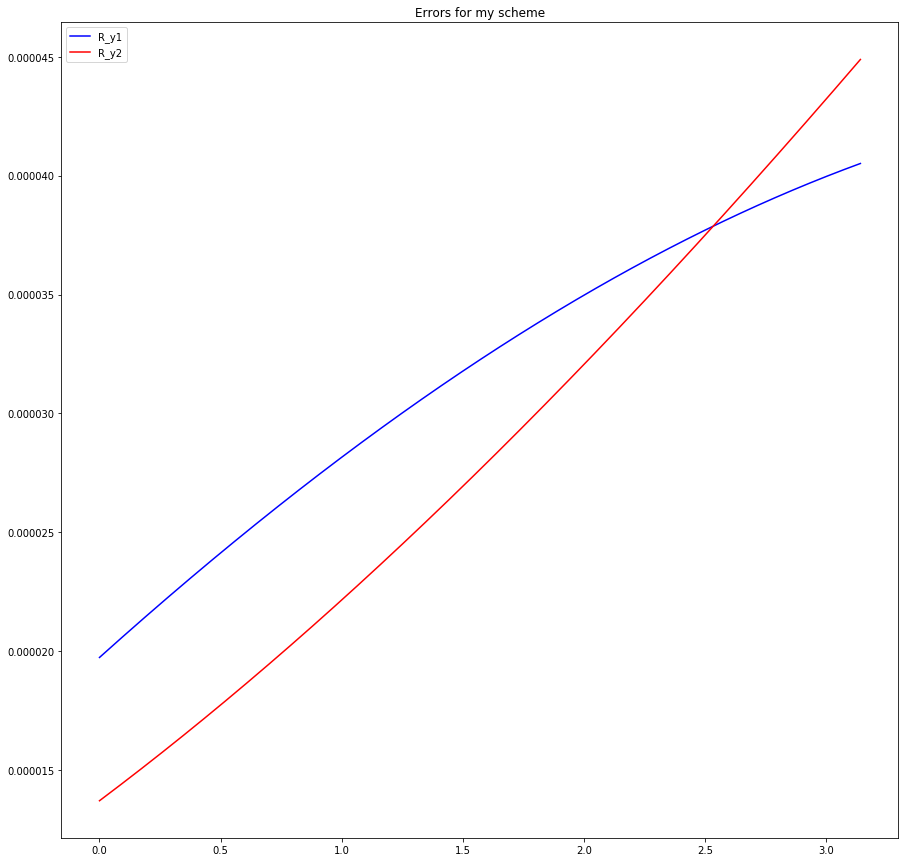

In [43]:
x = np.arange(0, np.pi, h_my)
y1_h1, y2_h1 = runge_kutta_my_scheme_for_plot(h_my)
y1_h1, y2_h1 = y1_h1[1:], y2_h1[1:]
y1_h2, y2_h2 = runge_kutta_my_scheme_for_plot(h_my/2)
y1_h2, y2_h2 = y1_h2[1::2], y2_h2[1::2]
R_1 = abs(y1_h2 - y1_h1)/3
R_2 = abs(y2_h2 - y2_h1)/3
plt.figure(figsize=(15, 15))
plt.title("Errors for my scheme")
plt.plot(x, R_1, color='blue')
plt.plot(x, R_2, color='red')
plt.legend(["R_y1", "R_y2"]);

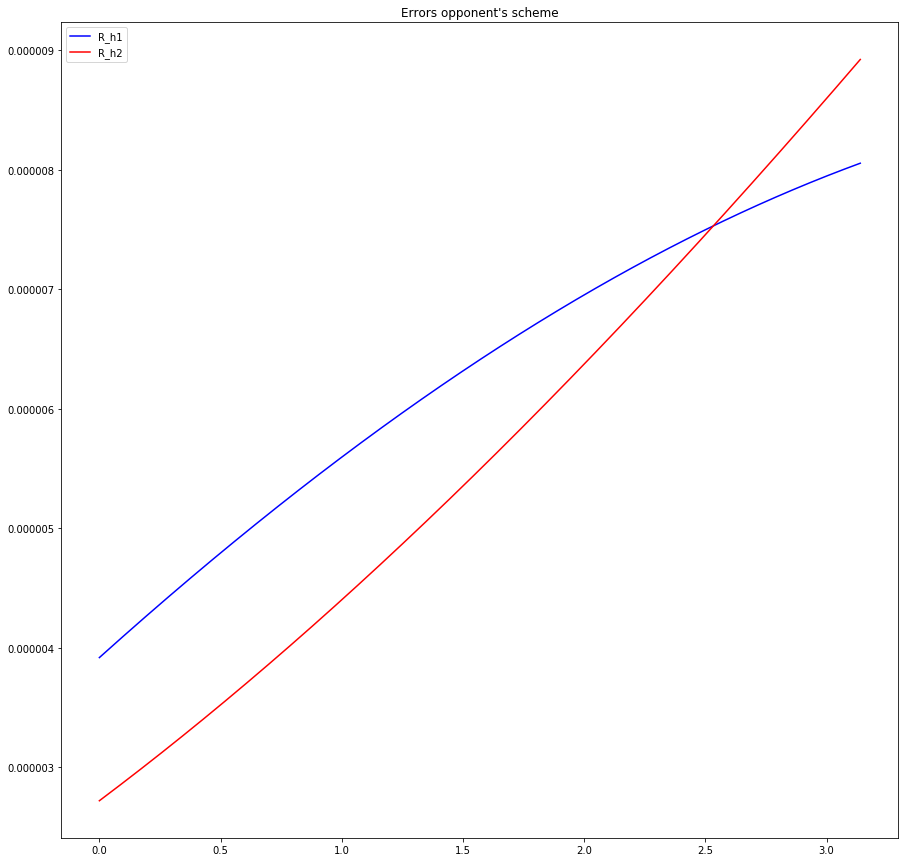

In [44]:
x = np.arange(0, np.pi, h_opponent)
y1_h1, y2_h1 = runge_kutta_opponent_for_plot(h_opponent)
y1_h1, y2_h1 = y1_h1[1:], y2_h1[1:]
y1_h2, y2_h2 = runge_kutta_opponent_for_plot(h_opponent/2)
y1_h2, y2_h2 = y1_h2[1::2], y2_h2[1::2]
R_1 = abs(y1_h2 - y1_h1)/15
R_2 = abs(y2_h2 - y2_h1)/15
plt.figure(figsize=(15, 15))
plt.title("Errors opponent's scheme")
plt.plot(x, R_1, color='blue')
plt.plot(x, R_2, color='red')
plt.legend(["R_h1", "R_h2"]);

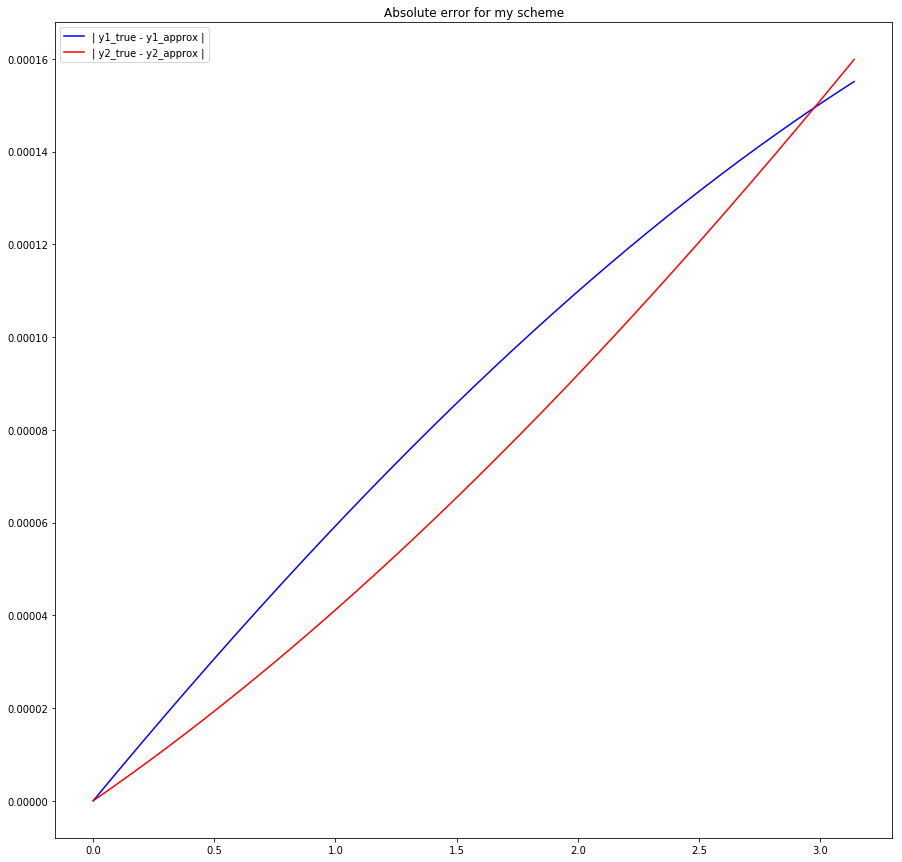

In [25]:
x = np.arange(0, np.pi, h_my)
y1, y2 = runge_kutta_my_scheme_for_plot(h_my)

plt.figure(figsize=(15, 15))
plat.title("Absolute error for my scheme")
plt.plot(x, abs(y1[:-1] - y1_(x)), color='blue')
plt.plot(x, abs(y2[:-1] - y2_(x)), color='red')
plt.legend(["| y1_true - y1_approx |", "| y2_true - y2_approx |"]);

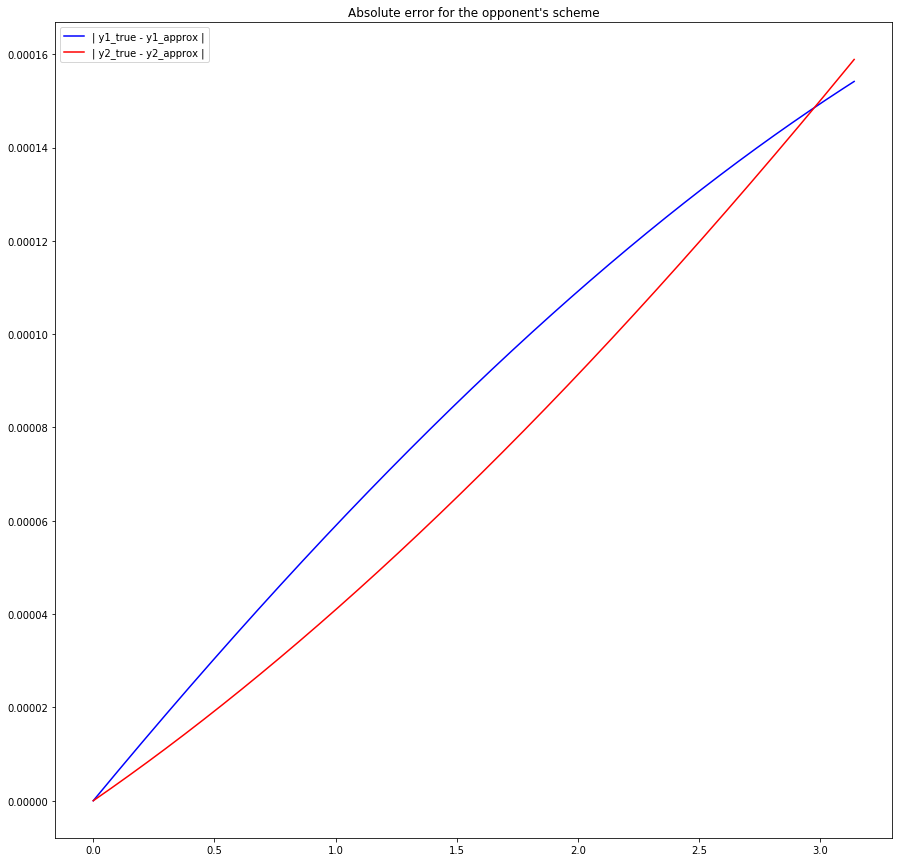

In [27]:
x = np.arange(0, np.pi, h_opponent)
y1, y2 = runge_kutta_opponent_for_plot(h_opponent)
plt.figure(figsize=(15, 15))
plt.title("Absolute error for the opponent's scheme")
plt.plot(x, abs(y1[:-1] - y1_(x)), color='blue')
plt.plot(x, abs(y2[:-1] - y2_(x)), color='red')
plt.legend(["| y1_true - y1_approx |", "| y2_true - y2_approx |"]);

In [ ]:
return np.array(whole_y), whole_h